In [1]:
import os
import copy
import pickle
import warnings
import pandas as pd
import numpy as np
import numpy.ma as ma
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import bootstrap
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import palettable
import deepdish as dd


from astropy.utils.console import ProgressBar
from astropy.table import QTable
plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 25})

In [2]:
data_dir="/Users/xushuo/work/Submit/Simulation/data/"
fig_dir="/Users/xushuo/work/Papers/Simulation/Figure/"

In [3]:
tab1=dd.io.load(data_dir+'galaxies_tng100_072.hdf5','/physical_mass')
tab=dd.io.load(data_dir+'galaxies_illustris_108.hdf5','/physical_mass')

In [4]:
tab

gal_num,proj,catsh_primary,mass_halo,mass_stellar_gal,mass_stellar_ins,mass_stellar_exs,aper_10_ins,aper_10_exs,aper_10_gal,aper_30_ins,aper_30_exs,aper_30_gal,aper_50_ins,aper_50_exs,aper_50_gal,aper_75_ins,aper_75_exs,aper_75_gal,aper_100_ins,aper_100_exs,aper_100_gal,aper_150_ins,aper_150_exs,aper_150_gal,ellipticity,ellipticity_ins,ellipticity_exs,ellipticity_10,ellipticity_ins_10,ellipticity_exs_10,ellipticity_30,ellipticity_ins_30,ellipticity_exs_30,ellipticity_40,ellipticity_ins_40,ellipticity_exs_40,ellipticity_50,ellipticity_ins_50,ellipticity_exs_50,ellipticity_inner_10_20,ellipticity_outer_25_45,r_20_ins,r_20_exs,r_20_gal,r_20_ins_force,r_20_exs_force,r_50_ins,r_50_exs,r_50_gal,r_50_ins_force,r_50_exs_force,r_80_ins,r_80_exs,r_80_gal,r_80_ins_force,r_80_exs_force
int64,str2,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,xy,True,127510947265625.0,2066190376043.6265,560686390562.5717,1505503985481.056,207555627036.31488,311410076235.10693,518965703271.4219,332995744727.9463,650475591743.5587,983471336471.5051,394779222382.93054,837603620637.4735,1232382843020.404,446410616540.2208,997610374458.4845,1444020990998.7053,482440025275.73016,1134225452994.5535,1616665478270.2837,524339935571.7939,1324561069021.4067,1848901004593.2004,0.32051579020551424,0.38182305138178424,0.26912022002313535,0.11887833954263763,0.28828927791392495,0.08399582714352186,0.2422404035479222,0.17523937245971777,0.26441841674823563,0.2890390255324931,0.20480825910004063,0.31436413925876283,0.3150809312061456,0.2307518664325393,0.34708777838795907,0.07845638067499065,0.2706602653122911,4.453013677994293,8.312433919362359,6.726747199500424,4.259572961040245,8.503696538956616,17.577347548100676,31.36501742439625,27.367585055347366,17.101920678317047,31.806234026912538,65.60281752946415,89.78408526046293,84.63300563775309,64.2237801279608,90.75981199295953
0,yz,True,127510947265625.0,1867802922224.7195,532005478048.9415,1335797444175.7788,196140711982.10077,272754618424.8649,468895330406.9657,316421301141.2937,581103647738.856,897524948880.1497,375969561271.97144,758853104131.1758,1134822665403.1472,424476204624.6023,893355598029.102,1317831802653.704,457832999008.3449,986631387630.4888,1444464386638.8337,498410861613.12775,1141293466248.4358,1639704327861.5632,0.3624096429724563,0.3223886638750534,0.3948415005914963,0.16703969204166785,0.18845435668085084,0.20633268098352653,0.32951611647285933,0.25241286394505114,0.3640093493217514,0.3355566370752251,0.2560296472412398,0.3627791580035491,0.36501975130603587,0.2616529132965592,0.3892292722297077,0.17582512301914924,0.3344566378576153,4.719377601148539,8.629622891641016,6.776676322148272,4.836773960822231,8.424812492223792,16.114937073563876,30.22786666820265,25.86532101646567,16.342337044746248,29.872456133514813,62.7002813404644,84.63486407593089,78.10897426434553,63.27050693391395,83.98263902474187
0,xz,True,127510947265625.0,1869264318507.6355,529825527415.87537,1339438791091.7615,199214021105.60626,275400738351.77594,474614759457.3822,318855306819.29517,584440962648.7996,903296269468.0945,378473318575.24475,771404147578.7714,1149877466154.016,432142899066.47363,923037124213.196,1355180023279.67,469036978626.5963,1049934391006.0436,1518971369632.64,507049574609.4642,1238262813157.0505,1745312387766.5144,0.30273716773926046,0.23796619960636234,0.35817152789267703,0.13129653854546194,0.09129612886194348,0.214997356535397,0.27169908806610804,0.2008301068449049,0.2931405340346713,0.27908421230607794,0.18029194565339696,0.29661297304616074,0.23953931204513956,0.18364456482206604,0.267589455760996,0.15430445848959962,

In [5]:
#calculated the exsitu fraction for different stellar mass measure and different simulation
sma_list=np.asarray([10,30,50,75,100,150])
simulation=[]
aperture=[]
fexs_tab=[]
proj='xy'
mask=(tab['catsh_primary']==True)&(tab['proj']==proj)&(tab['mass_stellar_ins']>1e10)&(tab['mass_stellar_exs']>10**10.5)
mask1=(tab1['catsh_primary']==True)&(tab1['proj']==proj)&(tab1['mass_stellar_ins']>1e10)&(tab1['mass_stellar_exs']>10**10.5)
for i in sma_list:
    fexstab=tab['aper_'+str(i)+'_exs'][mask]/tab['aper_'+str(i)+'_gal'][mask]
    fexstab1=tab1['aper_'+str(i)+'_exs'][mask1]/tab1['aper_'+str(i)+'_gal'][mask1]
    for gal_num in range(len(tab1[mask1])):
        simulation.append(r'\rm TNG100')
        aperture.append(r'$'+str(i)+'$')
        fexs_tab.append(fexstab1[gal_num])
    for gal_num in range(len(tab[mask])):
        simulation.append(r'\rm Illustris')
        aperture.append(r'$'+str(i)+'$')
        fexs_tab.append(fexstab[gal_num])
    
for i in sma_list[:-2:]:
    fexstab=(tab['aper_100_exs'][mask]-tab['aper_'+str(i)+'_exs'][mask])/(tab['aper_100_gal'][mask]-tab['aper_'+str(i)+'_gal'][mask])
    fexstab1=(tab1['aper_100_exs'][mask1]-tab1['aper_'+str(i)+'_exs'][mask1])/(tab1['aper_100_gal'][mask1]-tab1['aper_'+str(i)+'_gal'][mask1])
    for gal_num in range(len(tab1[mask1])):
        simulation.append(r'\rm TNG100')
        aperture.append(r'$['+str(i)+',100]$')
        fexs_tab.append(fexstab1[gal_num])
    for gal_num in range(len(tab[mask])):
        simulation.append(r'\rm Illustris')
        aperture.append(r'$['+str(i)+',100]$')
        fexs_tab.append(fexstab[gal_num])
    

In [6]:
tot_tab=pd.DataFrame({r"{\rm Simulation}":simulation,r"${\rm Aperture/Outskirt\ [kpc]}$":aperture, r'$f_{\rm exs}$':fexs_tab})

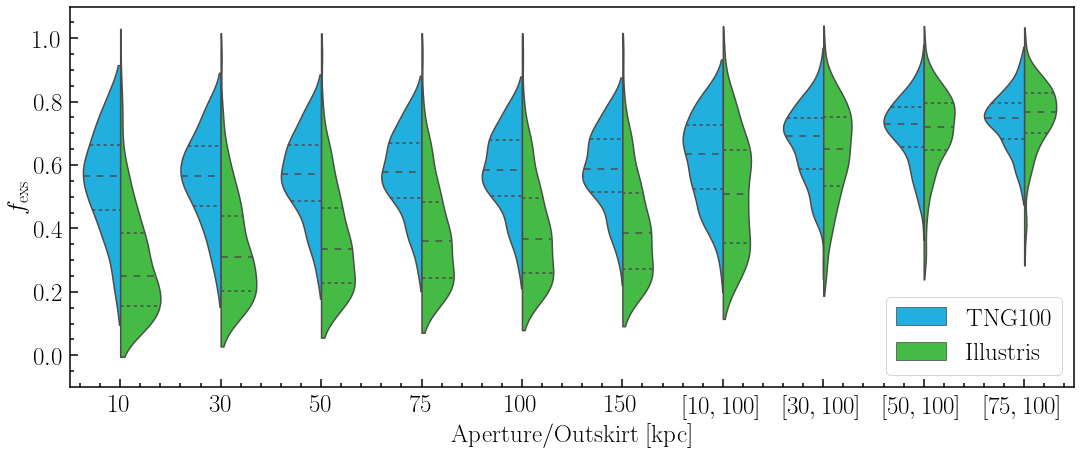

In [8]:
#plot violin plot
plt.figure(figsize=(18, 7))
sns.violinplot(data = tot_tab, x = r'${\rm Aperture/Outskirt\ [kpc]}$', y = r'$f_{\rm exs}$',hue=r'{\rm Simulation}',
               split='True',inner='quartile',palette={r'\rm TNG100':'deepskyblue',r'\rm Illustris':'limegreen'},cut=1)
plt.legend(loc=4)
plt.ylim(-0.1,1.1)
plt.savefig(fig_dir+'Fig7.png',dpi=200)
plt.show()